In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import plotly.express as px

In [2]:
crop_data = pd.read_csv("crop_production.csv")

In [3]:
crop_data

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arecanut    1254.0      2000.0  
1       Other Kharif pulses       2.0         1.0  
2                      Rice     102.0       321.0  
3                    Banana     176.0       641.0  
4                 Cashewnut     720.0       165.0  
...                     ...       ...         ...  
246086                 Rice     306.0       801.0  
246087              Sesamum     627.0       463.0  
246088            Sugarcane     324.0     16250.0  
246089                 Rice  279151.0    597899.0  
246090              Sesamum     175.0        88.0  

[246091 rows x 7 columns]

In [4]:
crop_data.shape

(246091, 7)

In [5]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [6]:
crop_data.describe()

Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09

In [7]:
Crop_Null_total= crop_data.isnull().sum().sort_values(ascending =False)
percentage = ((crop_data.isnull().sum()/crop_data.isnull().count())*100).sort_values(ascending=False)
missing_data= pd.concat([Crop_Null_total, percentage], axis = 1, keys=["Total", "Percentage"])
missing_data

Total  Percentage
Production      3730    1.515699
State_Name         0    0.000000
District_Name      0    0.000000
Crop_Year          0    0.000000
Season             0    0.000000
Crop               0    0.000000
Area               0    0.000000

In [8]:
crop_data.dropna(inplace = True)

In [9]:
crop_data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [10]:
crop_data.State_Name.nunique(dropna =True)

33

In [11]:
crop_data.Crop_Year.nunique(dropna =True)

19

In [12]:
crop_data.Season.nunique(dropna =True)

6

In [13]:
crop_data.District_Name.nunique(dropna =True)


646

In [14]:
crop_data.Crop.nunique(dropna =True)

124

In [15]:
crop_data.shape

(242361, 7)

# EDA

## Checking for Correlation between variables

<AxesSubplot:>

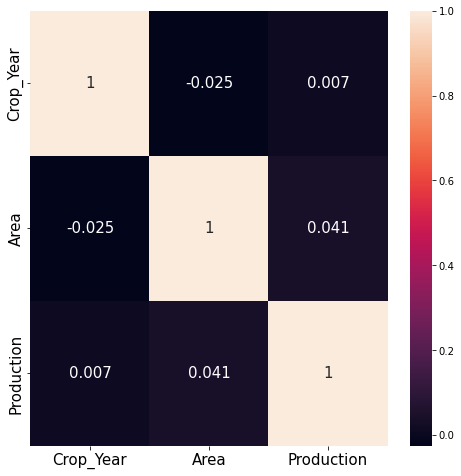

In [16]:
plt.subplots(figsize=(8,8)) 
plt.tick_params(labelsize=15)
sns.heatmap(crop_data.corr(),annot=True, annot_kws={'size': 15})

There is no variable showing high correlation with any other variable in the dataset.

# Removing outliers

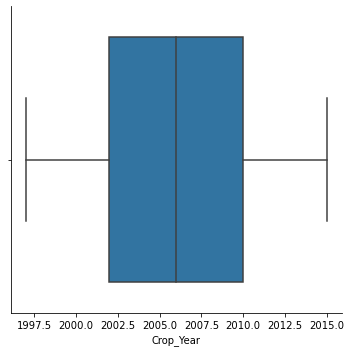

In [17]:
sns.catplot(x="Crop_Year", kind="box", data = crop_data)

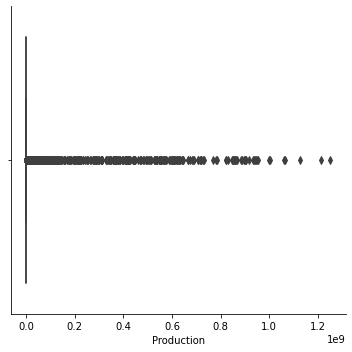

In [18]:
sns.catplot(x='Production', kind="box", data = crop_data)

### Removing Production Outlier

In [19]:
first_quantile_Production = crop_data["Production"].quantile(.25)
third_quantile_Production = crop_data["Production"].quantile(.75)
inter_quantile_Production = third_quantile_Production-first_quantile_Production
boundary_Production_Production = third_quantile_Production + 110000 * inter_quantile_Production
boundary_Production_Production

762857023.0

In [20]:
crop_data.drop(crop_data[crop_data['Production']>boundary_Production_Production].index,axis=0, inplace = True)

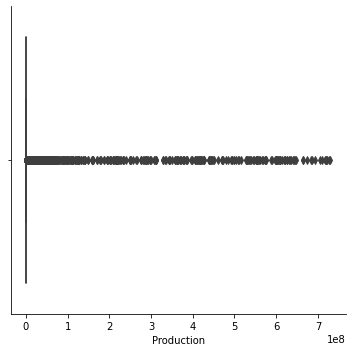

In [21]:
sns.catplot(x="Production", kind="box", data = crop_data)

In [22]:
crop_data.shape

(242327, 7)

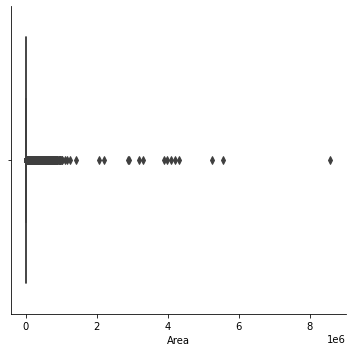

In [23]:
sns.catplot(x="Area", kind="box", data = crop_data)

### Removing Area Outlier

In [24]:
first_quantile_area = crop_data["Area"].quantile(.25)
third_quantile_area = crop_data["Area"].quantile(.75)
inter_quantile_area = third_quantile_area-first_quantile_area
boundary_area = third_quantile_area + 240 * inter_quantile_area
boundary_area

1072416.5

In [25]:
crop_data.drop(crop_data[crop_data['Area']>boundary_area].index,axis=0, inplace = True)

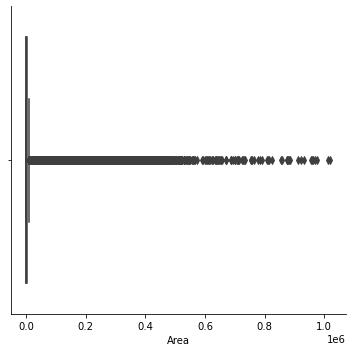

In [26]:
sns.catplot(x="Area", kind="box", data = crop_data)

In [27]:
crop_data.shape

(242309, 7)

In [28]:
crop_data["Season"].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [29]:
crop_data['Season'] = crop_data['Season'].replace(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], ['Kharif','Whole Year', 'Autumn', 'Rabi',
       'Summer', 'Winter'])

In [30]:
crop_data["Season"].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [31]:
crop_data

State_Name District_Name  Crop_Year      Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
1       Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
2       Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year   
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year   
...                             ...           ...        ...         ...   
246086                  West Bengal       PURULIA       2014      Summer   
246087                  West Bengal       PURULIA       2014      Summer   
246088                  West Bengal       PURULIA       2014  Whole Year   
246089                  West Bengal       PURULIA       2014      Winter   
246090                  West Bengal       PURULIA       2014      Winter   

                       Crop      Area  Production  
0                  Arecanut    1254.0      2000.0  
1       Other Kharif pulses       2.0         1.0  
2                      Rice     102.0       321.0  
3                    Banana     176.0       641.0  
4                 Cashewnut     720.0       165.0  
...                     ...       ...         ...  
246086                 Rice     306.0       801.0  
246087              Sesamum     627.0       463.0  
246088            Sugarcane     324.0     16250.0  
246089                 Rice  279151.0    597899.0  
246090              Sesamum     175.0        88.0  

[242309 rows x 7 columns]

In [32]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

# Data Visualisation

## Production based on State

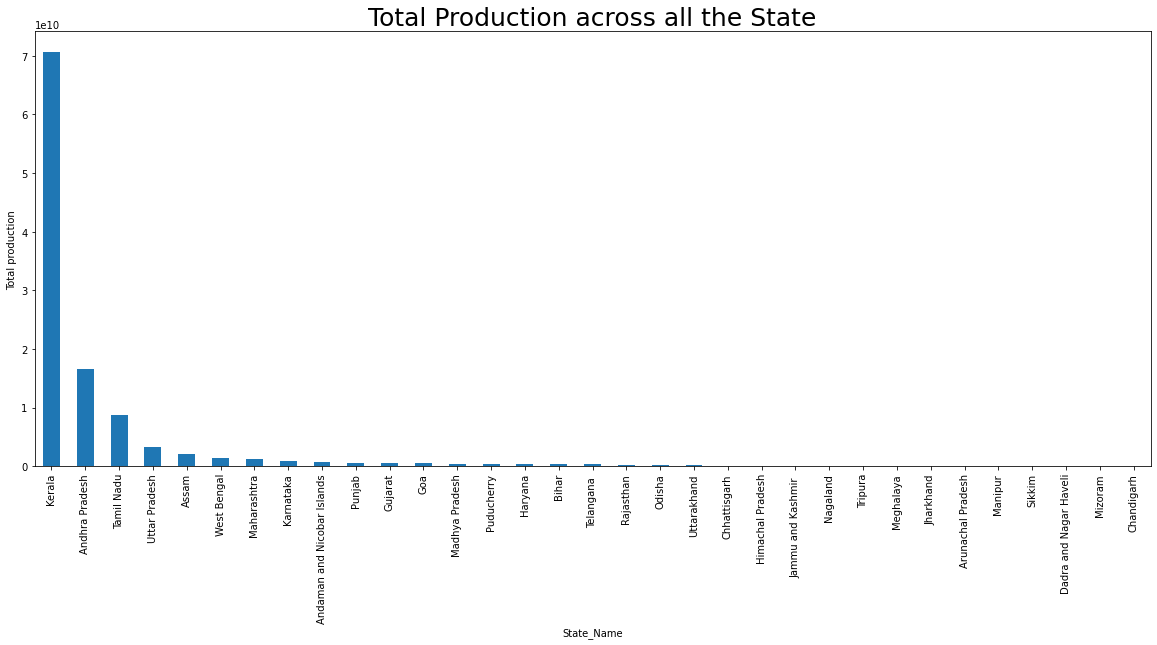

In [33]:
plt.figure(figsize=(20,8))
crop_data.groupby('State_Name')["Production"].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Production across all the State', size=25)
plt.ylabel('Total production');

Kerala is highest crop producing state whereas chandigarh is least and Top 3 crop producing states are from south India

## Production per unit area according to state 

In [34]:
temp1 = crop_data.groupby('State_Name')['Area', 'Production'].sum().reset_index()
temp1['Production_Per_Unit_Area'] = temp1['Production']/temp1['Area']
temp1 = temp1.sort_values(by='Production_Per_Unit_Area')
px.bar(temp1, 'State_Name', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area')

C:\Users\Mahesh\AppData\Local\Temp\ipykernel_4432\2033193110.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp1 = crop_data.groupby('State_Name')['Area', 'Production'].sum().reset_index()


Kerala is the most productive state in terms of production by area. Even small states like Andaman and nikobar islands, Goa, Panduchery and many other states which are low in overall production, have high productivity.

## Crop Production in India yearly

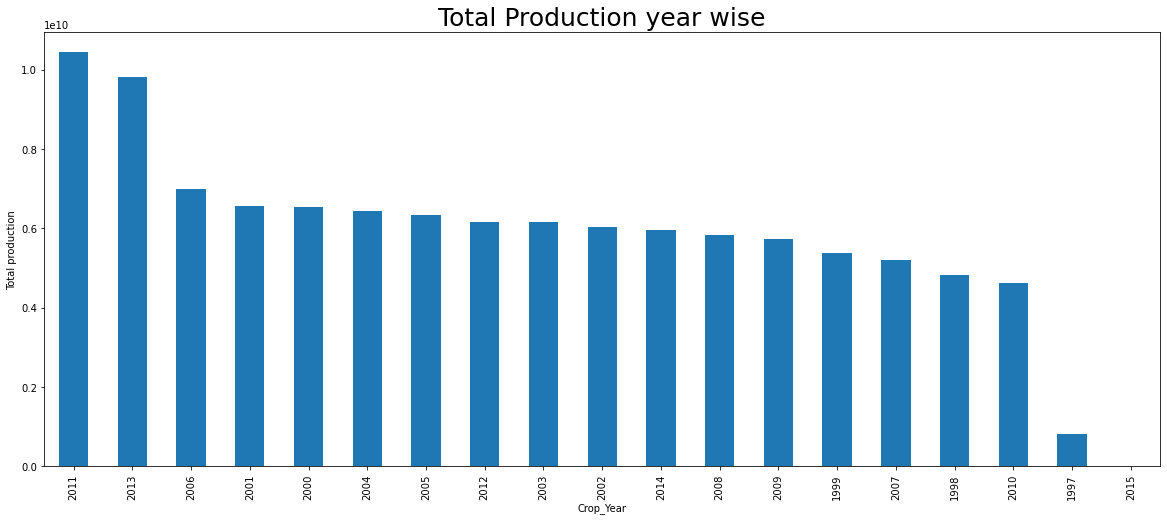

In [35]:
plt.figure(figsize=(20,8))
crop_data.groupby('Crop_Year')["Production"].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Production year wise', size=25)
plt.ylabel('Total production');

Hence 2013 is the most productive year where as 1997 is less productive

## Production per unit area according to state

In [36]:
temp_crop = crop_data.groupby('Crop_Year')['Area', 'Production'].sum().reset_index()
temp_crop['Production_Per_Unit_Area'] = temp_crop['Production']/temp_crop['Area']
temp_crop = temp_crop.sort_values(by='Production_Per_Unit_Area')
px.bar(temp_crop, 'Crop_Year', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area')

C:\Users\Mahesh\AppData\Local\Temp\ipykernel_4432\3454950519.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



yearly production per unit are is getting increased, may be due to occupancy of larger agricultural land across the country

## Total Production Season wise

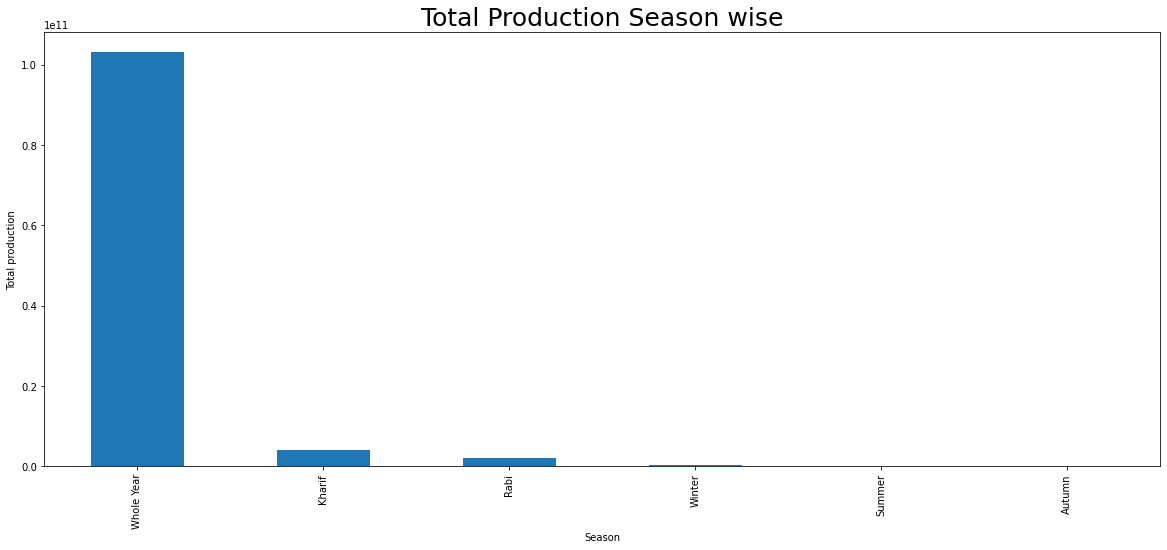

In [37]:
plt.figure(figsize=(20,8))
crop_data.groupby('Season')["Production"].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Production Season wise', size=25)
plt.ylabel('Total production');

Kharif is the season where india is growing major crops 

## Production per unit area according to Season

In [38]:
temp_Season = crop_data.groupby('Season')['Area', 'Production'].sum().reset_index()
temp_Season['Production_Per_Unit_Area'] = temp_Season['Production']/temp_Season['Area']
temp_Season = temp_Season.sort_values(by='Production_Per_Unit_Area')
px.bar(temp_Season, 'Season', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area')

C:\Users\Mahesh\AppData\Local\Temp\ipykernel_4432\2403418496.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Production per area is constant through out but little lesser in Autumn.

## Total Production Crop wise

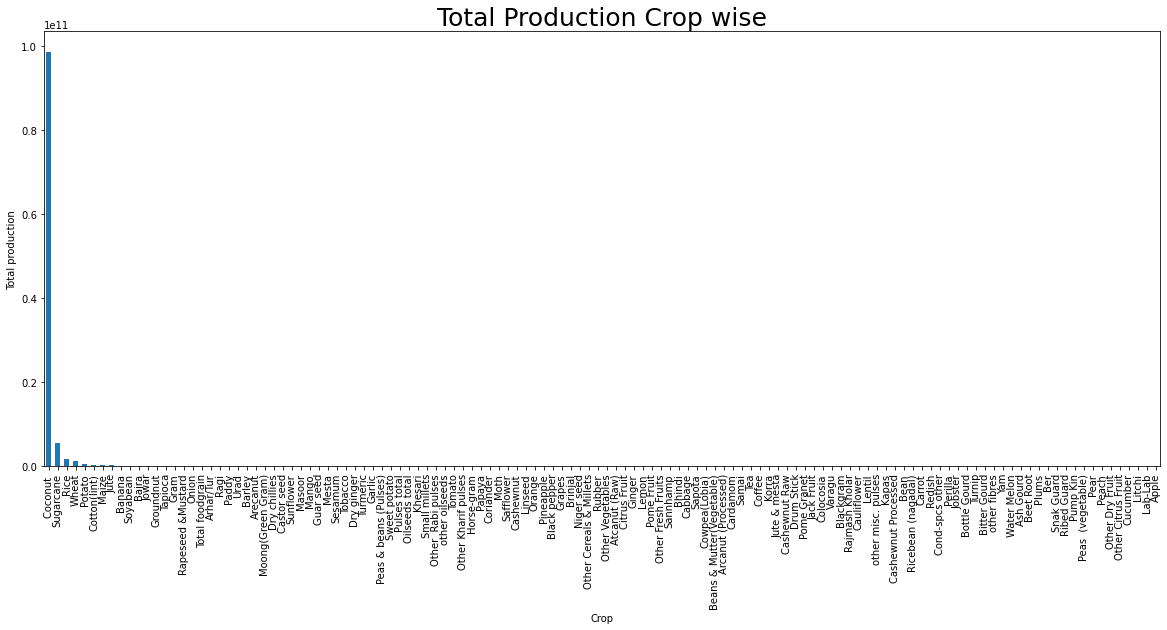

In [39]:
plt.figure(figsize=(20,8))
crop_data.groupby('Crop')["Production"].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Production Crop wise', size=25)
plt.ylabel('Total production');


Coconut is the highest producing crop in India

## Production per unit area according to Crop

In [40]:
temp_Crop = crop_data.groupby('Crop')['Area', 'Production'].sum().reset_index()
temp_Crop['Production_Per_Unit_Area'] = temp_Crop['Production']/temp_Crop['Area']
temp_Crop = temp_Crop.sort_values(by='Production_Per_Unit_Area')
px.bar(temp_Crop.tail(5), 'Crop', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area')

C:\Users\Mahesh\AppData\Local\Temp\ipykernel_4432\1163459552.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



As production of coconut is higher, same the production rate is also high for coconut

## Total area for production across different state

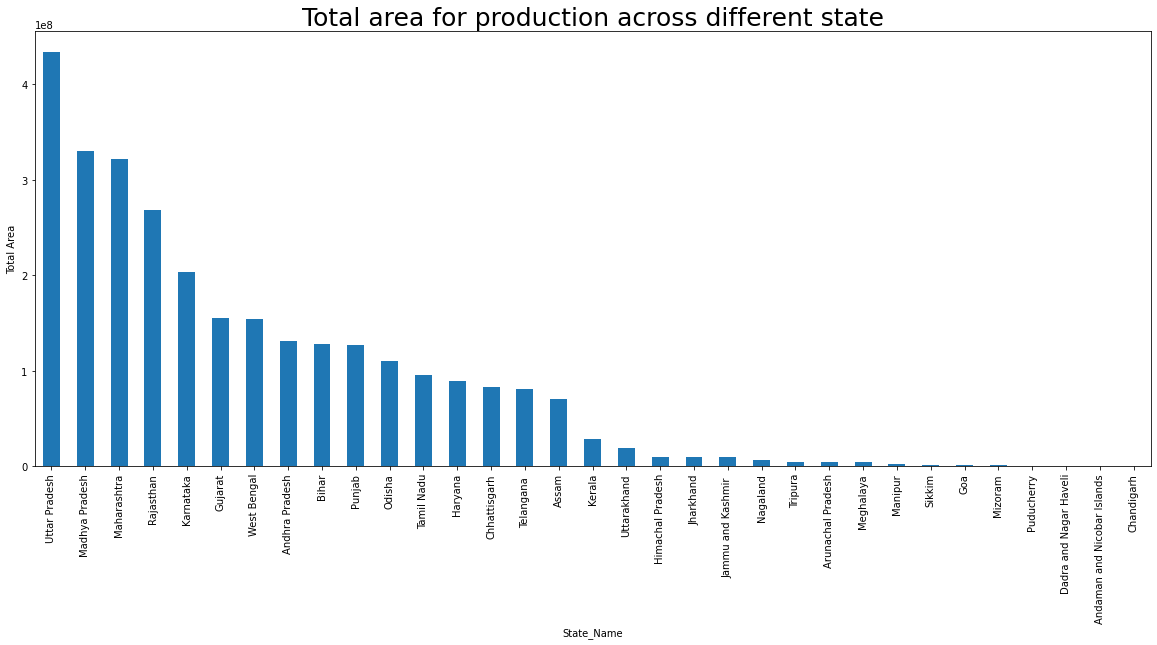

In [41]:
plt.figure(figsize=(20,8))
crop_data.groupby('State_Name')["Area"].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total area for production across different state', size=25)
plt.ylabel('Total Area');

Uttarpradesh has higher area for crop production

## Total area of production for different Crop

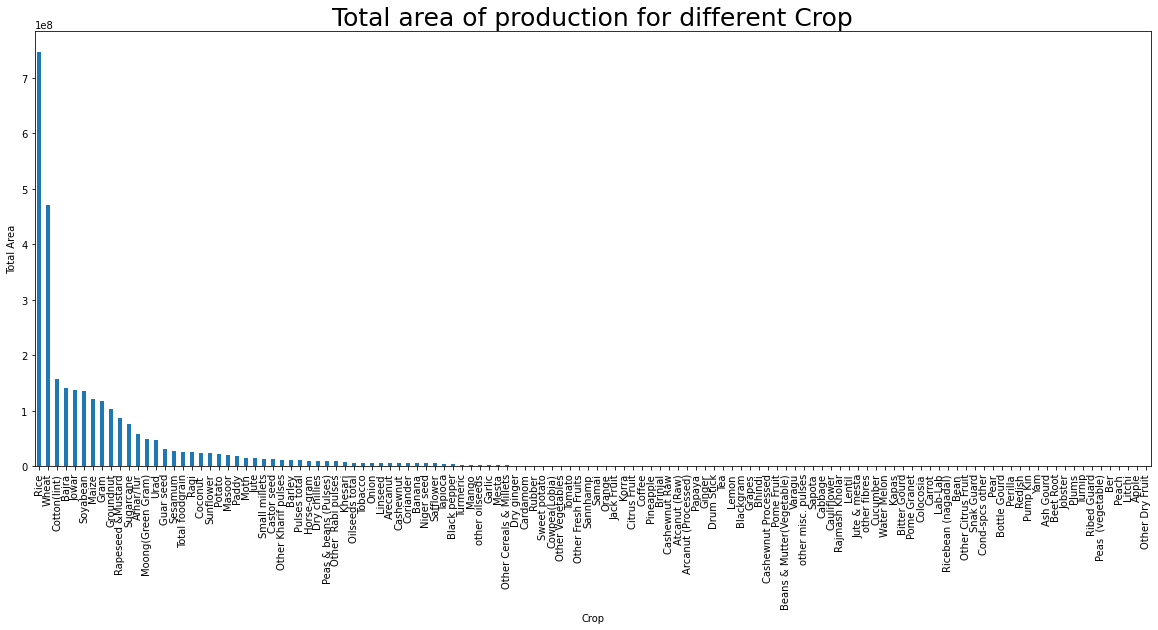

In [42]:
plt.figure(figsize=(20,8))
crop_data.groupby('Crop')["Area"].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total area of production for different Crop', size=25)
plt.ylabel('Total Area');

Hence rice is grown in abbudent area across India

In [43]:
temp2 = crop_data.groupby(by='Season')['Area'].mean().reset_index()
px.line(temp2, 'Season', 'Area')

Season wise area is getting increased for crop production 

In [44]:
temp3 = crop_data.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.line(temp3, 'Crop_Year', 'Area')

Average Crop Area has decresed over the years due to urbanisation, indusatrilisation and resedential areas across the states or may be due to lack of knowledege or intrest towards agriculture. Lowest Average Crop area are in the Year 2002 and 2003 after that slightly increased due to providing proper KT towards the agricultural products and providing benefits to farmer. (We have very comparitively very less data of year 2015 so, we'll not consider that)

## Top 5 Crop producting States

In [45]:
temp_top5_production = crop_data.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(temp_top5_production.tail(5), 'State_Name', 'Production')

## 5 least Crop producting State in India

In [46]:
temp_top5_production = crop_data.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(temp_top5_production.head(5), 'State_Name', 'Production')

# Top 5 Crop produced

In [47]:
temp_top5_production_crop = crop_data.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(temp_top5_production_crop.tail(5), 'Crop', 'Production')

In [48]:
temp_top5_production_crop[temp_top5_production_crop['Production']==0]

Crop  Production
0                 Apple         0.0
79                 Pear         0.0
72      Other Dry Fruit         0.0
71   Other Citrus Fruit         0.0
80    Peas  (vegetable)         0.0
84                Plums         0.0
89             Pump Kin         0.0
58               Litchi         0.0
54              Lab-Lab         0.0
94          Ribed Guard         0.0
35             Cucumber         0.0
104          Snak Guard         0.0
78                Peach         0.0
11            Beet Root         0.0
121        other fibres         0.0
12                  Ber         0.0
120                 Yam         0.0
4             Ash Gourd         0.0
118         Water Melon         0.0

0 producing crop in India(may be due to lack of data)

## Top 5 Crop producting District

In [49]:
temp_top5_production_district = crop_data.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(temp_top5_production_district.tail(5), 'District_Name', 'Production')

## Least 5 Crop producting States

In [50]:
px.bar(temp_top5_production_district.head(5), 'District_Name', 'Production')

# Top 3 highest crop produced in India Analysis

In [51]:
temp_top5_production_crop = crop_data.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(temp_top5_production_crop.tail(3), 'Crop', 'Production')

In [52]:
crop_data["Crop"].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

## 1. Coconut

In [53]:
Coconut_df = crop_data[crop_data["Crop"]=="Coconut "]
Coconut_df

State_Name District_Name  Crop_Year      Season  \
5       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year   
14      Andaman and Nicobar Islands      NICOBARS       2001  Whole Year   
23      Andaman and Nicobar Islands      NICOBARS       2002  Whole Year   
32      Andaman and Nicobar Islands      NICOBARS       2003  Whole Year   
41      Andaman and Nicobar Islands      NICOBARS       2004  Whole Year   
...                             ...           ...        ...         ...   
245719                  West Bengal       PURULIA       2004  Whole Year   
245756                  West Bengal       PURULIA       2005  Whole Year   
245792                  West Bengal       PURULIA       2006  Whole Year   
245837                  West Bengal       PURULIA       2007  Whole Year   
245879                  West Bengal       PURULIA       2008  Whole Year   

            Crop      Area  Production  
5       Coconut   18168.00  65100000.0  
14      Coconut   18190.00  64430000.0  
23      Coconut   18240.00  67490000.0  
32      Coconut   18284.74  68580000.0  
41      Coconut   18394.70  52380000.0  
...          ...       ...         ...  
245719  Coconut      66.00       296.1  
245756  Coconut      74.00       311.0  
245792  Coconut      73.00    365000.0  
245837  Coconut      58.00    898000.0  
245879  Coconut      58.00       598.0  

[1924 rows x 7 columns]

In [54]:
Coconut_production = Coconut_df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Coconut_production, 'State_Name', 'Production')

In [55]:
Coconut_production = Coconut_df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Coconut_production, 'District_Name', 'Production')

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

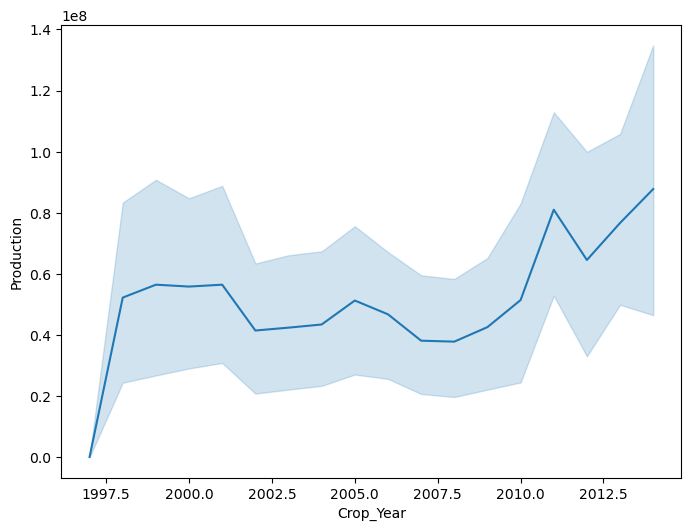

In [56]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=Coconut_df,x='Crop_Year',y='Production')

In [57]:
Coconut_production = Coconut_df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Coconut_production, 'Season', 'Production')

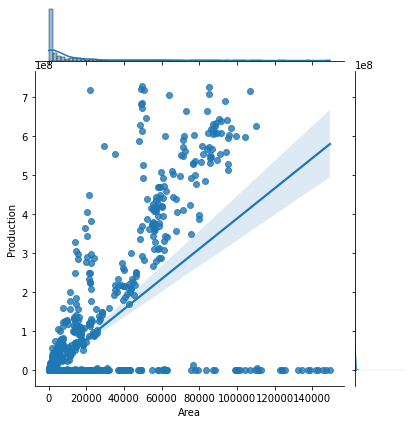

In [58]:
sns.jointplot(x = "Area",y = "Production",data=Coconut_df,kind="reg")
plt.show()

Coconut is majorly produced in South Indian states where there is high rainfall. <br> Over the year the production of coconut is getting increased. <br> It is mainly grown during Kharfi season across the countries. <br> From Data Visualization: coconut production is mostly depends on Season, Area, State(place).

# 2. Sugarcane

In [59]:
Sugarcane_df = crop_data[crop_data["Crop"]=="Sugarcane"]
Sugarcane_df

State_Name District_Name  Crop_Year      Season  \
7       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year   
16      Andaman and Nicobar Islands      NICOBARS       2001  Whole Year   
26      Andaman and Nicobar Islands      NICOBARS       2002  Whole Year   
60      Andaman and Nicobar Islands      NICOBARS       2006  Whole Year   
65      Andaman and Nicobar Islands      NICOBARS       2010      Autumn   
...                             ...           ...        ...         ...   
245953                  West Bengal       PURULIA       2010  Whole Year   
245984                  West Bengal       PURULIA       2011  Whole Year   
246016                  West Bengal       PURULIA       2012  Whole Year   
246051                  West Bengal       PURULIA       2013  Whole Year   
246088                  West Bengal       PURULIA       2014  Whole Year   

             Crop   Area  Production  
7       Sugarcane    1.0        2.00  
16      Sugarcane    1.0        1.00  
26      Sugarcane    5.0       40.00  
60      Sugarcane    0.2        0.50  
65      Sugarcane   13.4       41.75  
...           ...    ...         ...  
245953  Sugarcane  303.0    11541.00  
245984  Sugarcane  303.0    20264.00  
246016  Sugarcane  314.0    11199.00  
246051  Sugarcane  161.0     7948.00  
246088  Sugarcane  324.0    16250.00  

[7827 rows x 7 columns]

In [60]:
Sugarcane_production = Sugarcane_df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Sugarcane_production, 'State_Name', 'Production')

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

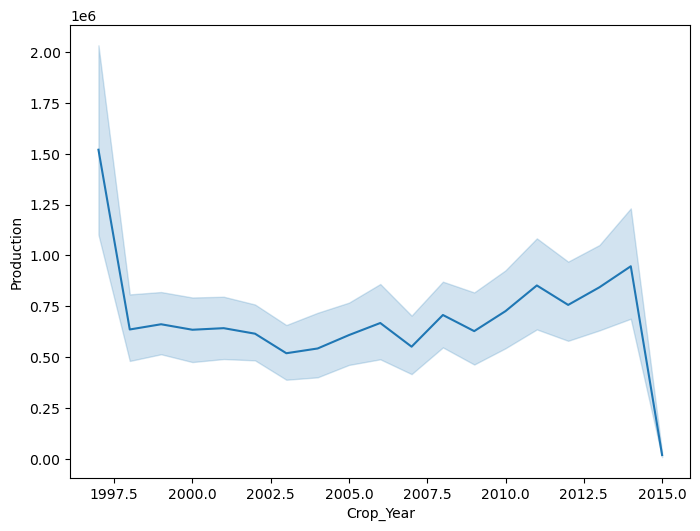

In [61]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=Sugarcane_df,x='Crop_Year',y='Production')

In [62]:
Sugarcane_production = Sugarcane_df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Sugarcane_production, 'District_Name', 'Production')

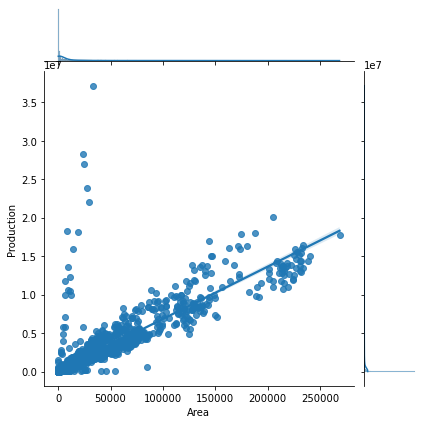

In [63]:
sns.jointplot(x = "Area",y = "Production",data=Sugarcane_df,kind="reg")
plt.show()

In [64]:
Sugarcane_production = Sugarcane_df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Sugarcane_production, 'Season', 'Production')

<AxesSubplot:xlabel='Crop_Year', ylabel='Area'>

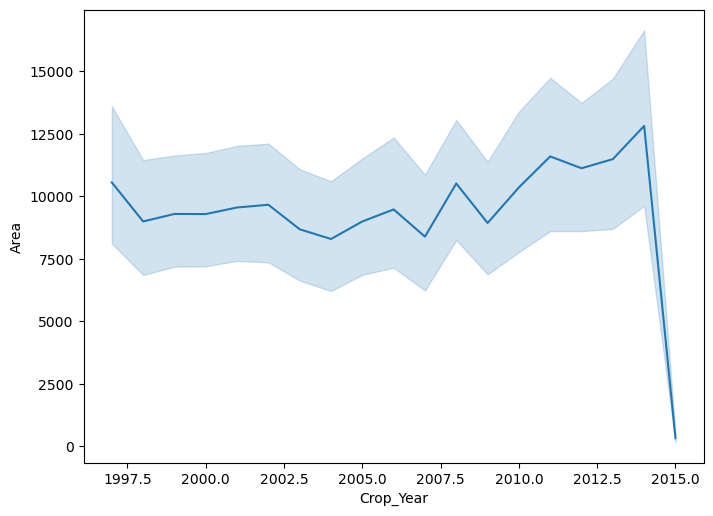

In [65]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=Sugarcane_df,x='Crop_Year',y='Area')

Sugarcane is largly produced in Uttarpradesh and other than that it is majorly produced in South Indian districts.<br> After 1998 the production of Sugarcane is getting increased.<br> It is mainly grown during Kharif season across the countries.<br>
Also as the area increases and the production is getting increased. <br>From Data Visualization: Sugarcane production is mostly depends on Season, Area, State(place).

# 3.Rice

In [66]:
Rice_df = crop_data[crop_data["Crop"]=="Rice"]
Rice_df

State_Name District_Name  Crop_Year  Season  Crop  \
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif  Rice   
12      Andaman and Nicobar Islands      NICOBARS       2001  Kharif  Rice   
18      Andaman and Nicobar Islands      NICOBARS       2002  Kharif  Rice   
27      Andaman and Nicobar Islands      NICOBARS       2003  Kharif  Rice   
36      Andaman and Nicobar Islands      NICOBARS       2004  Kharif  Rice   
...                             ...           ...        ...     ...   ...   
246049                  West Bengal       PURULIA       2013  Summer  Rice   
246052                  West Bengal       PURULIA       2013  Winter  Rice   
246058                  West Bengal       PURULIA       2014  Autumn  Rice   
246086                  West Bengal       PURULIA       2014  Summer  Rice   
246089                  West Bengal       PURULIA       2014  Winter  Rice   

             Area  Production  
2          102.00      321.00  
12          83.00      300.00  
18         189.20      510.84  
27          52.00       90.17  
36          52.94       72.57  
...           ...         ...  
246049     516.00     1274.00  
246052  302274.00   730136.00  
246058     264.00      721.00  
246086     306.00      801.00  
246089  279151.00   597899.00  

[15082 rows x 7 columns]

In [67]:
Rice_production = Rice_df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Rice_production, 'State_Name', 'Production')

In [68]:
Rice_production = Rice_df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Rice_production, 'District_Name', 'Production')

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

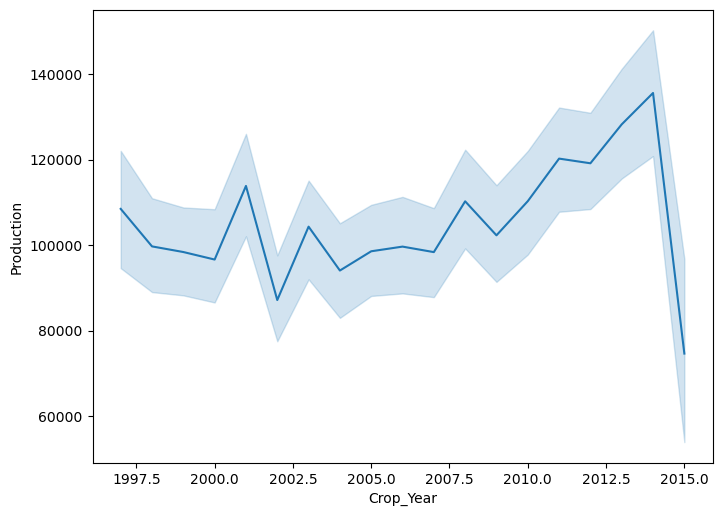

In [69]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=Rice_df,x='Crop_Year',y='Production')

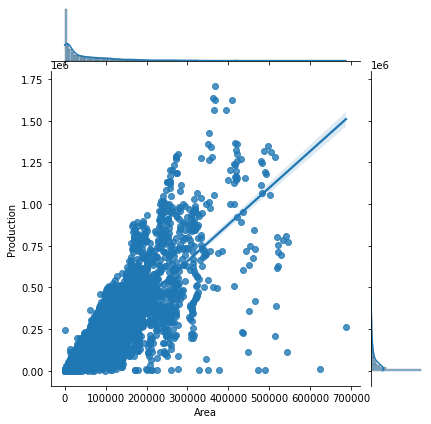

In [70]:
sns.jointplot(x = "Area",y = "Production",data=Rice_df,kind="reg")
plt.show()

In [71]:
Rice_production = Rice_df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Rice_production, 'Season', 'Production')

<AxesSubplot:xlabel='Crop_Year', ylabel='Area'>

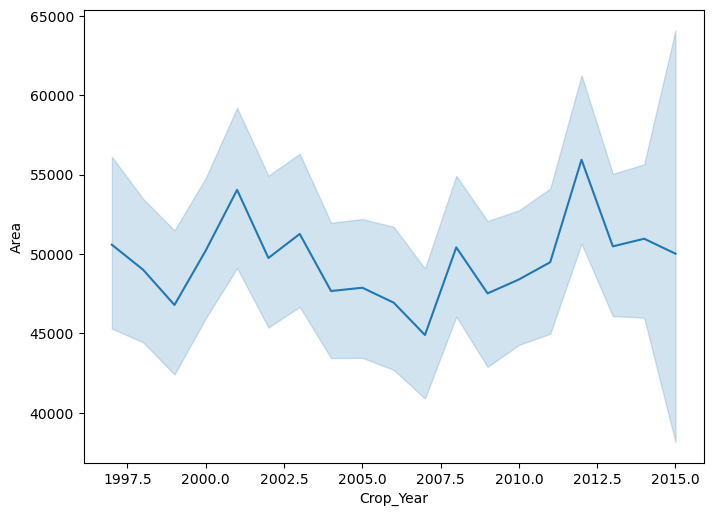

In [72]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=Rice_df,x='Crop_Year',y='Area')

Rice is largly produced in norther part of India.<br>
The production of Sugarcane is getting increased.<br>
It is mainly grown during Kharif season across the countries.<br>
Also as the area for production is getting increased and the production is also getting increased.<br>
From Data Visualization: Rice production is also mostly depends on Season, Area, State(place).<br>

# Seasonal crops Analysis

In [73]:
crop_data["Season"].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

# Kharif

In [74]:
Kharif_df = crop_data[crop_data["Season"]=="Kharif"]
Kharif_df

State_Name District_Name  Crop_Year  Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif   
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif   
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif   
10      Andaman and Nicobar Islands      NICOBARS       2001  Kharif   
11      Andaman and Nicobar Islands      NICOBARS       2001  Kharif   
...                             ...           ...        ...     ...   
246066                  West Bengal       PURULIA       2014  Kharif   
246067                  West Bengal       PURULIA       2014  Kharif   
246068                  West Bengal       PURULIA       2014  Kharif   
246069                  West Bengal       PURULIA       2014  Kharif   
246070                  West Bengal       PURULIA       2014  Kharif   

                       Crop     Area  Production  
0                  Arecanut   1254.0      2000.0  
1       Other Kharif pulses      2.0         1.0  
2                      Rice    102.0       321.0  
10                 Arecanut   1254.0      2061.0  
11      Other Kharif pulses      2.0         1.0  
...                     ...      ...         ...  
246066  Other Kharif pulses     79.0        39.0  
246067             Sannhamp    171.0       727.0  
246068             Soyabean     18.0         7.0  
246069            Sunflower     46.0        42.0  
246070                 Urad  11493.0      3287.0  

[94283 rows x 7 columns]

In [75]:
Kharif_production = Kharif_df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Kharif_production, 'State_Name', 'Production')

In [76]:
Kharif_production = Kharif_df.groupby(by='State_Name')['Production'].mean().reset_index().sort_values(by = 'Production')
px.bar(Kharif_production, 'State_Name', 'Production')

In [77]:
Kharif_production = Kharif_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Kharif_production, 'Crop', 'Production')

In [78]:
Kharif_production = Kharif_df.groupby(by='Crop')['Production'].mean().reset_index().sort_values(by = 'Production')
px.bar(Kharif_production, 'Crop', 'Production')

Hence during Kharif season majorly crops are grown in uttarpradesh but on for all crops average crop grown is in punjab.<br> During kharif season major crop grown is Sugarcane

# Autumn

In [79]:
Autumn_df = crop_data[crop_data["Season"]=="Autumn"]
Autumn_df

State_Name             District_Name  Crop_Year  \
64      Andaman and Nicobar Islands                  NICOBARS       2010   
65      Andaman and Nicobar Islands                  NICOBARS       2010   
111     Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN       2010   
112     Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN       2010   
185     Andaman and Nicobar Islands            SOUTH ANDAMANS       2010   
...                             ...                       ...        ...   
246056                  West Bengal                   PURULIA       2014   
246057                  West Bengal                   PURULIA       2014   
246058                  West Bengal                   PURULIA       2014   
246059                  West Bengal                   PURULIA       2014   
246060                  West Bengal                   PURULIA       2014   

        Season           Crop     Area  Production  
64      Autumn           Rice     3.50       10.00  
65      Autumn      Sugarcane    13.40       41.75  
111     Autumn           Rice  6791.00    20118.00  
112     Autumn      Sugarcane    73.33      889.20  
185     Autumn           Rice  1595.50     3788.00  
...        ...            ...      ...         ...  
246056  Autumn          Maize  6317.00    13337.00  
246057  Autumn           Ragi   112.00       44.00  
246058  Autumn           Rice   264.00      721.00  
246059  Autumn        Sesamum   170.00       87.00  
246060  Autumn  Small millets   154.00       41.00  

[4930 rows x 7 columns]

In [80]:
Autumn_production = Autumn_df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Autumn_production, 'State_Name', 'Production')

In [81]:
Autumn_production = Autumn_df.groupby(by='State_Name')['Production'].mean().reset_index().sort_values(by = 'Production')
px.bar(Autumn_production, 'State_Name', 'Production')

In [82]:
Autumn_production = Autumn_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Autumn_production, 'Crop', 'Production')

In [83]:
Autumn_production = Autumn_df.groupby(by='Crop')['Production'].mean().reset_index().sort_values(by = 'Production')
px.bar(Autumn_production, 'Crop', 'Production')

Hence during Autumn season majorly crops are grown in Northen part of India.<br> During Autumn season major crop grown are Rice, Paddy and Maize

# Rabi

In [84]:
Rabi_df = crop_data[crop_data["Season"]=="Rabi"]
Rabi_df

State_Name District_Name  Crop_Year Season  \
66      Andaman and Nicobar Islands      NICOBARS       2010   Rabi   
67      Andaman and Nicobar Islands      NICOBARS       2010   Rabi   
68      Andaman and Nicobar Islands      NICOBARS       2010   Rabi   
69      Andaman and Nicobar Islands      NICOBARS       2010   Rabi   
70      Andaman and Nicobar Islands      NICOBARS       2010   Rabi   
...                             ...           ...        ...    ...   
246080                  West Bengal       PURULIA       2014   Rabi   
246081                  West Bengal       PURULIA       2014   Rabi   
246082                  West Bengal       PURULIA       2014   Rabi   
246083                  West Bengal       PURULIA       2014   Rabi   
246084                  West Bengal       PURULIA       2014   Rabi   

                     Crop    Area  Production  
66               Arecanut   944.0     1610.00  
67           Black pepper    23.0        8.50  
68              Cashewnut  1000.5      260.50  
69           Dry chillies    12.0       25.00  
70             Dry ginger     7.0        9.64  
...                   ...     ...         ...  
246080             Potato   477.0     9995.00  
246081  Rapeseed &Mustard  1885.0     1508.00  
246082          Safflower    54.0       37.00  
246083               Urad   220.0      113.00  
246084              Wheat  1622.0     3663.00  

[66146 rows x 7 columns]

In [85]:
Rabi_production = Rabi_df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Rabi_production, 'State_Name', 'Production')

In [86]:
Rabi_production = Rabi_df.groupby(by='State_Name')['Production'].mean().reset_index().sort_values(by = 'Production')
px.bar(Rabi_production, 'State_Name', 'Production')

In [87]:
Rabi_production = Rabi_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Rabi_production, 'Crop', 'Production')

In [88]:
Rabi_production = Rabi_df.groupby(by='Crop')['Production'].mean().reset_index().sort_values(by = 'Production')
px.bar(Rabi_production, 'Crop', 'Production')

Hence during Rabi season majorly crops are grown in Northen part of India.<br> During Rabi season major crop grown are Wheat & Potato

# Winter

In [89]:
Winter_df = crop_data[crop_data["Season"]=="Winter"]
Winter_df

State_Name District_Name  Crop_Year  Season     Crop      Area  \
12406         Assam         BAKSA       2005  Winter     Rice   66229.0   
12438         Assam         BAKSA       2006  Winter     Rice   52195.0   
12472         Assam         BAKSA       2007  Winter     Rice   58558.0   
12506         Assam         BAKSA       2008  Winter     Rice   69495.0   
12540         Assam         BAKSA       2009  Winter     Rice   68453.0   
...             ...           ...        ...     ...      ...       ...   
246018  West Bengal       PURULIA       2012  Winter  Sesamum     224.0   
246052  West Bengal       PURULIA       2013  Winter     Rice  302274.0   
246053  West Bengal       PURULIA       2013  Winter  Sesamum     208.0   
246089  West Bengal       PURULIA       2014  Winter     Rice  279151.0   
246090  West Bengal       PURULIA       2014  Winter  Sesamum     175.0   

        Production  
12406      93287.0  
12438      67915.0  
12472      73246.0  
12506     124614.0  
12540     109965.0  
...            ...  
246018        88.0  
246052    730136.0  
246053       101.0  
246089    597899.0  
246090        88.0  

[6050 rows x 7 columns]

In [90]:
Winter_production = Winter_df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Winter_production, 'State_Name', 'Production')

In [91]:
Winter_production = Winter_df.groupby(by='State_Name')['Production'].mean().reset_index().sort_values(by = 'Production')
px.bar(Winter_production, 'State_Name', 'Production')

In [92]:
Winter_production = Winter_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Winter_production, 'Crop', 'Production')

In [93]:
Winter_production = Winter_df.groupby(by='Crop')['Production'].mean().reset_index().sort_values(by = 'Production')
px.bar(Winter_production, 'Crop', 'Production')

Hence during Winter season majorly crops are grown in Northen part of India.<br>During Rabi season major crop grown are Rice, Paddy & Sugarcane

# Summer

In [94]:
Summer_df = crop_data[crop_data["Season"]=="Summer"]
Summer_df

State_Name District_Name  Crop_Year  Season     Crop     Area  \
12396         Assam         BAKSA       2005  Summer     Rice  12650.0   
12426         Assam         BAKSA       2006  Summer     Rice  12737.0   
12458         Assam         BAKSA       2007  Summer     Rice   7124.0   
12492         Assam         BAKSA       2008  Summer     Rice  11712.0   
12526         Assam         BAKSA       2009  Summer     Rice  10524.0   
...             ...           ...        ...     ...      ...      ...   
246049  West Bengal       PURULIA       2013  Summer     Rice    516.0   
246050  West Bengal       PURULIA       2013  Summer  Sesamum    697.0   
246085  West Bengal       PURULIA       2014  Summer    Maize    325.0   
246086  West Bengal       PURULIA       2014  Summer     Rice    306.0   
246087  West Bengal       PURULIA       2014  Summer  Sesamum    627.0   

        Production  
12396      17027.0  
12426      25691.0  
12458      14341.0  
12492      20949.0  
12526      16463.0  
...            ...  
246049      1274.0  
246050       356.0  
246085      2039.0  
246086       801.0  
246087       463.0  

[14811 rows x 7 columns]

In [95]:
Summer_production = Summer_df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Summer_production, 'State_Name', 'Production')

In [96]:
Summer_production = Summer_df.groupby(by='State_Name')['Production'].mean().reset_index().sort_values(by = 'Production')
px.bar(Summer_production, 'State_Name', 'Production')

In [97]:
Summer_production = Summer_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Summer_production, 'Crop', 'Production')

In [98]:
Summer_production = Summer_df.groupby(by='Crop')['Production'].mean().reset_index().sort_values(by = 'Production')
px.bar(Summer_production, 'Crop', 'Production')

Hence during Summer season on an average crops are grown in Northen part of India.<br>During Summer season major crop grown are Rice, Paddy and Bajra

# Top Crop Producing State anlysis

In [99]:
Kerala_df = crop_data[crop_data["State_Name"]=="Kerala"]
Kerala_df

State_Name District_Name  Crop_Year      Season          Crop     Area  \
97987      Kerala     ALAPPUZHA       1997  Whole Year      Arecanut   2253.0   
97988      Kerala     ALAPPUZHA       1997  Whole Year  Black pepper   2235.0   
97989      Kerala     ALAPPUZHA       1997  Whole Year     Cashewnut   7205.0   
97990      Kerala     ALAPPUZHA       1997  Whole Year      Coconut   77893.0   
97991      Kerala     ALAPPUZHA       1997  Whole Year       Tapioca   3911.0   
...           ...           ...        ...         ...           ...      ...   
102242     Kerala       WAYANAD       2014  Whole Year       Sesamum      1.0   
102244     Kerala       WAYANAD       2014  Whole Year  Sweet potato      8.0   
102245     Kerala       WAYANAD       2014  Whole Year       Tapioca   2327.0   
102246     Kerala       WAYANAD       2014  Whole Year      Turmeric    161.0   
102247     Kerala       WAYANAD       2014      Winter          Rice   8651.0   

        Production  
97987      1518.00  
97988       248.00  
97989      2358.00  
97990    399000.00  
97991     74110.00  
...            ...  
102242        0.45  
102244      127.00  
102245    99788.00  
102246      481.00  
102247    23324.00  

[3973 rows x 7 columns]

In [100]:
Kerala_production = Kerala_df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Kerala_production, 'District_Name', 'Production')

<AxesSubplot:xlabel='Crop_Year', ylabel='Area'>

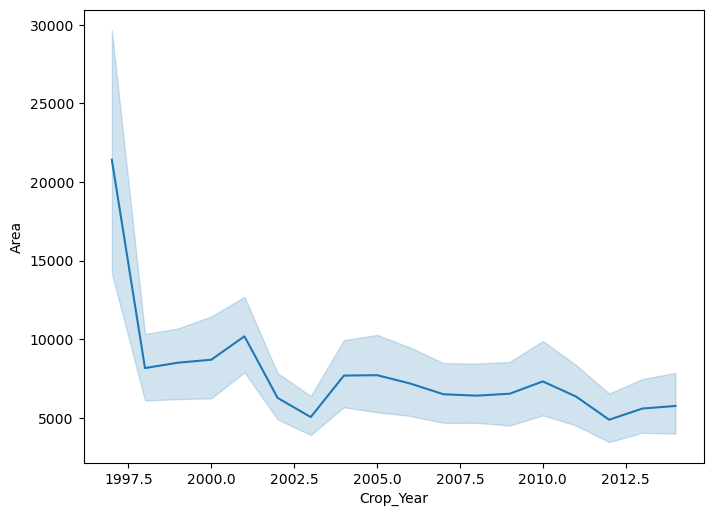

In [101]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=Kerala_df,x='Crop_Year',y='Area')

<AxesSubplot:xlabel='Season', ylabel='Area'>

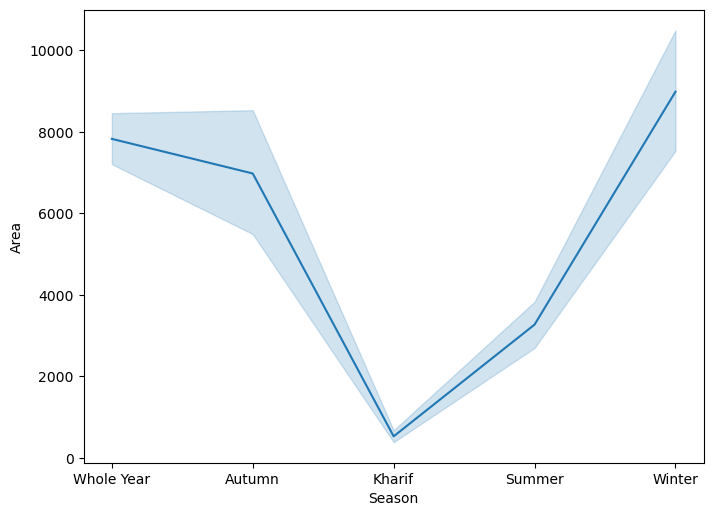

In [102]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=Kerala_df,x='Season',y='Area')

In [103]:
Kerala_production = Kerala_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Kerala_production, 'Crop', 'Production')

In [104]:
Kerala_production = Kerala_df.groupby(by='Crop_Year')['Production'].mean().reset_index().sort_values(by = 'Production')
px.bar(Kerala_production, 'Crop_Year', 'Production')

Hence Kerala's major crop is coconut<br> Tirunavantampuram is the district in Kerala where crop is produced more<br> Area for production is getting decreased in Kerala but still the production is at peak in India<br> Kerala is mainintaing Average crop production from 1998 to 2015 with 1 or 2 up downs

# Maharashtra Analysis

In [105]:
crop_data["State_Name"].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [106]:
Maharashtra_df = crop_data[crop_data["State_Name"]=="Maharashtra"]
Maharashtra_df

State_Name District_Name  Crop_Year      Season       Crop      Area  \
125191  Maharashtra    AHMEDNAGAR       1997      Autumn      Maize       1.0   
125192  Maharashtra    AHMEDNAGAR       1997      Kharif  Arhar/Tur   17600.0   
125193  Maharashtra    AHMEDNAGAR       1997      Kharif      Bajra  274100.0   
125194  Maharashtra    AHMEDNAGAR       1997      Kharif       Gram   40800.0   
125195  Maharashtra    AHMEDNAGAR       1997      Kharif      Jowar     900.0   
...             ...           ...        ...         ...        ...       ...   
137814  Maharashtra      YAVATMAL       2014        Rabi      Jowar    4000.0   
137815  Maharashtra      YAVATMAL       2014        Rabi      Maize    1300.0   
137816  Maharashtra      YAVATMAL       2014        Rabi      Wheat   29100.0   
137817  Maharashtra      YAVATMAL       2014      Summer  Groundnut    9400.0   
137818  Maharashtra      YAVATMAL       2014  Whole Year  Sugarcane    8100.0   

        Production  
125191      1113.0  
125192      6300.0  
125193    152800.0  
125194     18600.0  
125195      1100.0  
...            ...  
137814      3300.0  
137815       200.0  
137816     26800.0  
137817     11500.0  
137818    553700.0  

[12496 rows x 7 columns]

In [107]:
Maharashtra_production = Maharashtra_df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Maharashtra_production, 'District_Name', 'Production')

<AxesSubplot:xlabel='Crop_Year', ylabel='Area'>

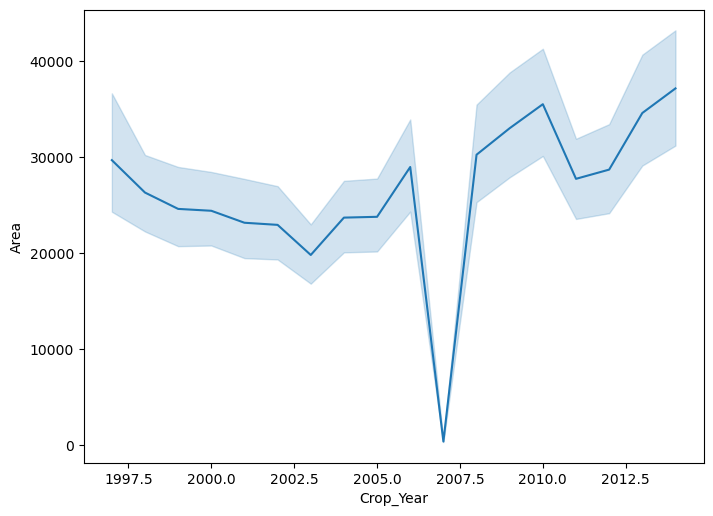

In [108]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=Maharashtra_df,x='Crop_Year',y='Area')

In [109]:
Maharashtra_production = Maharashtra_df.groupby(by='Crop_Year')['Production'].mean().reset_index().sort_values(by = 'Production')
px.bar(Maharashtra_production, 'Crop_Year', 'Production')

<AxesSubplot:xlabel='Season', ylabel='Area'>

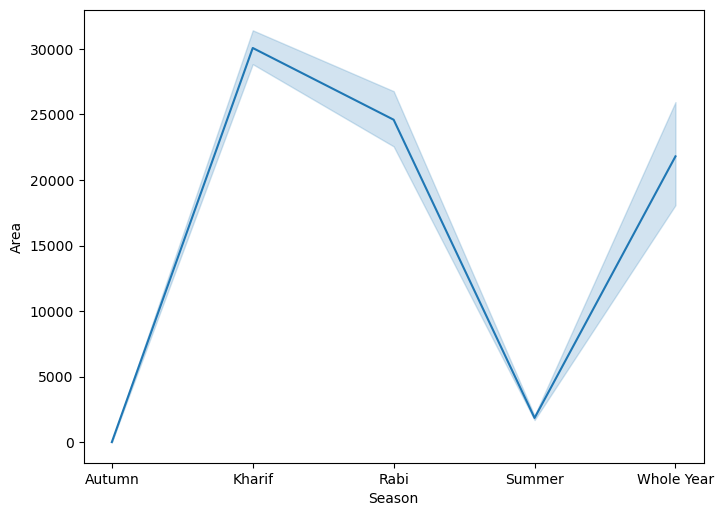

In [110]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=Maharashtra_df,x='Season',y='Area')

In [111]:
Maharashtra_production = Maharashtra_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(Maharashtra_production, 'Crop', 'Production')

Hence Maharashtra's major crop is Sugarcane.<br>
Khollpur is the district in Maharashtra where crop is produced more.<br>
Area for production is slightly getting increased.<br>
Maharastra avrearge production is getting constant after 2008.

# Visualization Done On:

1: State Wise, District, Year wise, Season Wise and type of crop wise Production

2: Checked for Rate of production vs all entities like State wise production vs production rate, crop wise production vs production rate.
        
3: Top Crops Production In India are Sugarcane, Rice and Sugarcane and same all 3 crop analysis are done accordingly and found all the crop depends on Season, Area and Place.
            
4: Season Wise crop production Analysis are done for different seasons Like Kharif, Rabi, Summer, Winter and Rabi and found crop production depends on Season and area where it is grown.

5: Top Crop producing state crop production analysis

6: Maharashtra's crop production analysis